In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image


In [14]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [15]:
training_set = datagen.flow_from_directory(
    '/kaggle/input/fer2013/train',   ##give path of training set
    target_size=(48,48),    
    batch_size=32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.


In [18]:
def load_image(path):
    img = Image.open(path)
    return img

In [19]:
image_path = '/kaggle/input/fer2013/train/angry/Training_10118481.jpg'
test_img = load_image(image_path)

In [25]:

# Convert the image to a numpy array
img_array = np.array(test_img)

# Reshape 
img_array = img_array.reshape((1,) + img_array.shape + (1,))

i = 0


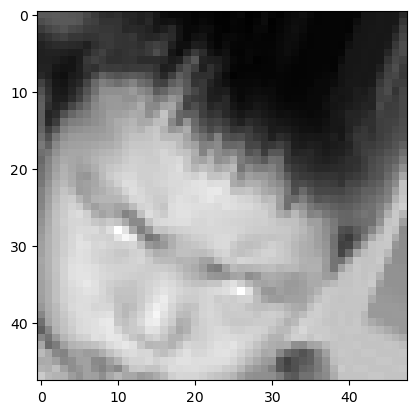

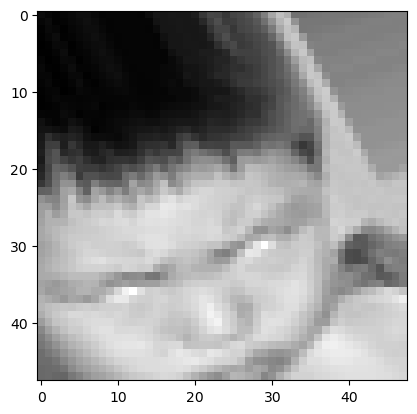

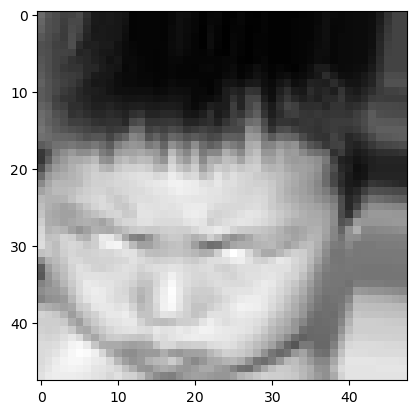

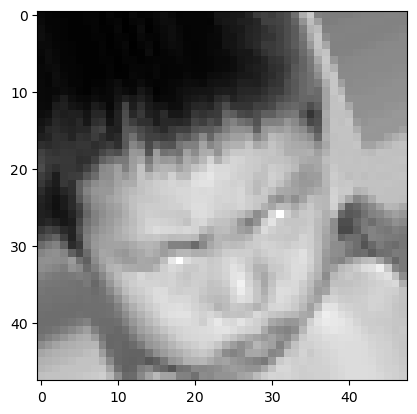

In [28]:
# Generate augmented images and visualize them
for batch in datagen.flow(img_array, batch_size=1, save_prefix='aug', save_format='jpeg'):
    augmented_img = Image.fromarray(np.uint8(batch[0, :, :, 0]))  
    plt.figure(i)
    plt.imshow(augmented_img, cmap='gray')  
    i += 1
    if i >= 4:  # Show 4 augmented images
        break

plt.show()


In [29]:
input_dir = '/kaggle/input/fer2013/train'
output_dir = '/kaggle/output/augmented_images'  

In [30]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [31]:
# Function to load and augment images
def augment_and_save_image(image_path, output_folder):
    img = Image.open(image_path)
    img_array = np.array(img)
    img_array = img_array.reshape((1,) + img_array.shape + (1,))
    
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_prefix='aug', save_format='jpeg'):
        augmented_img = Image.fromarray(np.uint8(batch[0, :, :, 0]))
        augmented_img.save(os.path.join(output_folder, f'augmented_{i}.jpg'))
        i += 1
        if i >= 4:  # Augment and save 4 images per input image
            break


In [34]:
for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Adjust extensions as needed
            image_path = os.path.join(root, file)
            augment_and_save_image(image_path, output_dir)

print("Done!!!")

Done!!!
